In [1]:
url_nobel = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/__Projects__/_06_Project_A%20Visual%20History%20of%20Nobel%20Prize%20Winners/datasets/nobel.csv"

## 1. The most Nobel of Prizes
<center>
<p>
  <a href="#">
    <img src='https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png'>
  </a>
</p>
</center>


The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?_

Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.

In [2]:
# Loading in required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the Nobel Prize data
nobel = pd.read_csv(url_nobel)

# Taking a look at the first several winners
nobel.head(n=6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## **2. So, who gets the Nobel Prize?**


In [3]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(nobel))

# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

## **3. USA dominance**


In [4]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


In [5]:
import plotly.express as px

fig = px.bar(prop_usa_winners, x='decade', y='usa_born_winner')
fig.show()

## **4. USA dominance, visualized**


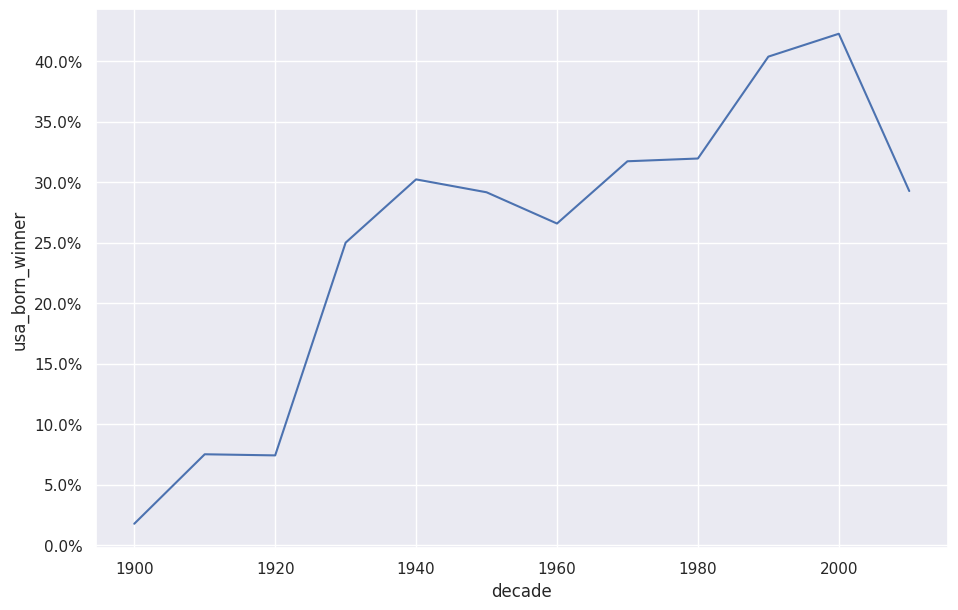

In [6]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## **5. What is the gender of a typical Nobel Prize winner?**


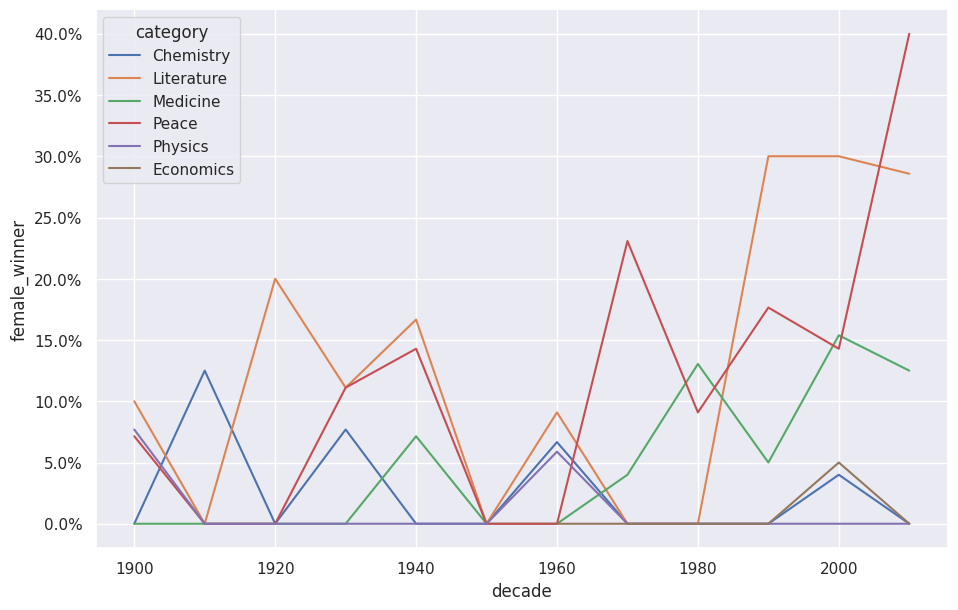

In [7]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Plotting female winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [8]:
import plotly.express as px

fig = px.line(prop_female_winners, x='decade', y='female_winner', color='category')
fig.show()

## **6. The first woman to win the Nobel Prize**


In [9]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel.sex == 'Female'].nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## **7. Repeat laureates**


In [10]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('full_name').filter(lambda group: len(group) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


## **8. How old are you when you get the prize?**


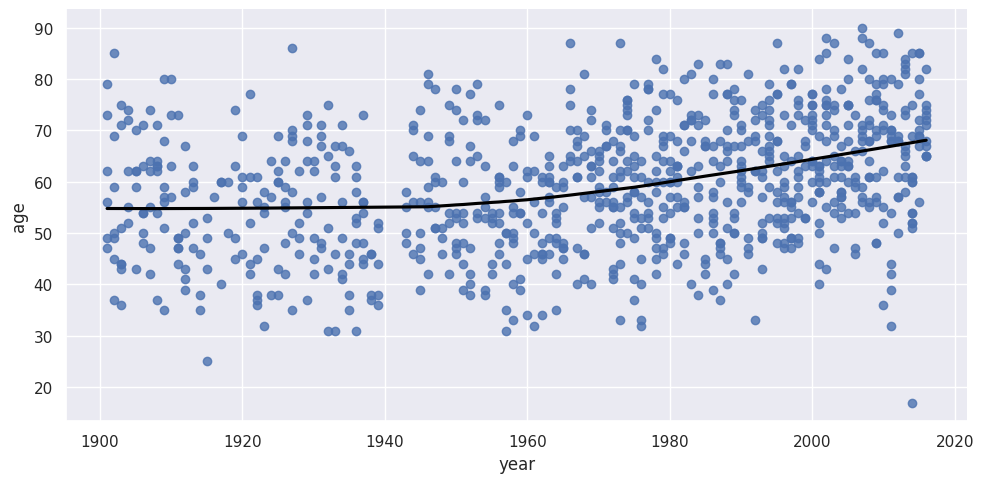

In [11]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, 
           aspect=2, line_kws={'color' : 'black'})

In [12]:
import plotly.express as px

fig = px.scatter(nobel, x='year', y='age', trendline='lowess')
fig.show()

## **9. Age differences between prize categories**

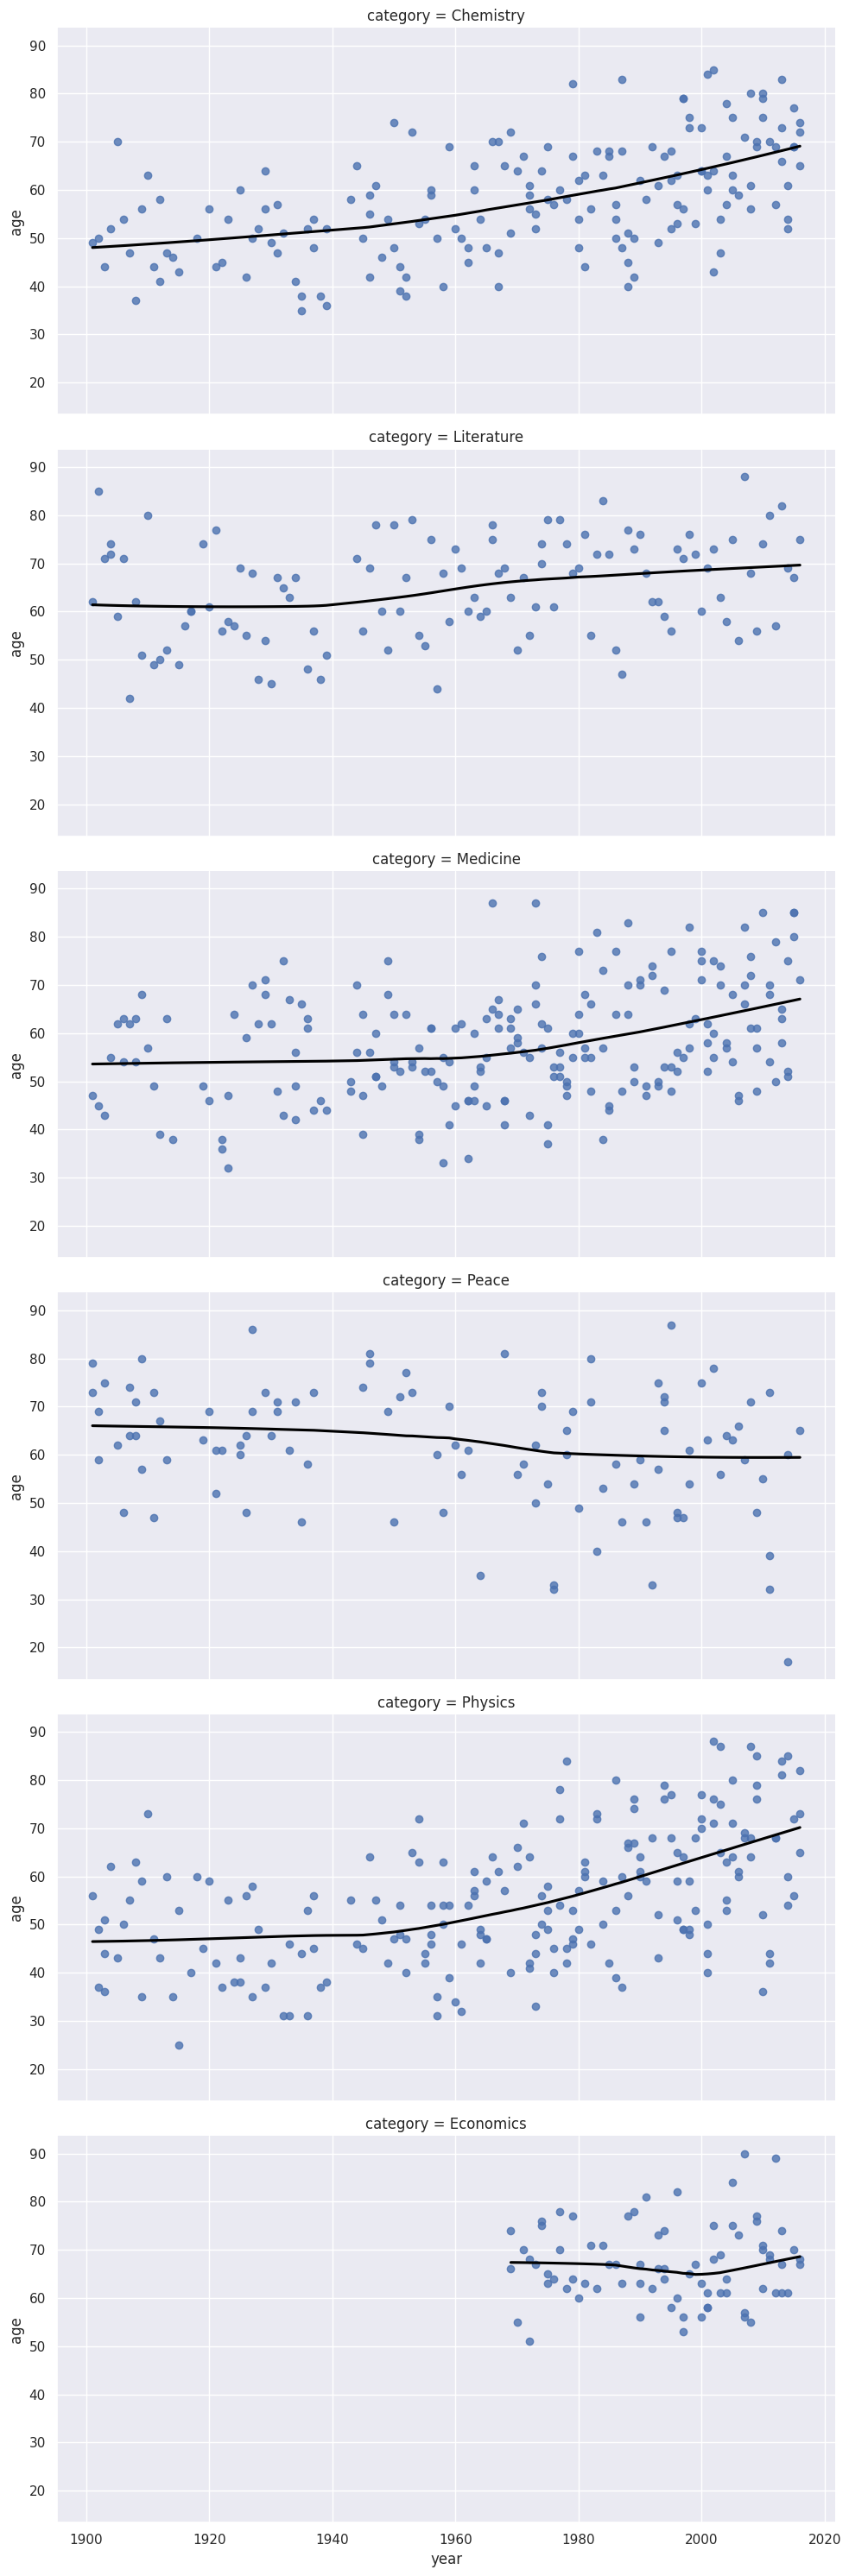

In [13]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', row='category', data=nobel, lowess=True, 
           aspect=2, line_kws={'color' : 'black'})

## **10. Oldest and youngest winners**


In [14]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


# **11. Other Plots** - - - `dataset ->  NOBEL.csv`

<center><p><img style="float: right;margin:20px 20px 20px 20px; max-width:200px" src="https://assets.datacamp.com/production/project_441/img/paint_nobel_prize.png"></p></center>

In [15]:
nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'usa_born_winner', 'decade', 'female_winner', 'age'],
      dtype='object')

In [16]:
nobel.dtypes

year                             int64
category                        object
prize                           object
motivation                      object
prize_share                     object
laureate_id                      int64
laureate_type                   object
full_name                       object
birth_date              datetime64[ns]
birth_city                      object
birth_country                   object
sex                             object
organization_name               object
organization_city               object
organization_country            object
death_date                      object
death_city                      object
death_country                   object
usa_born_winner                   bool
decade                           int64
female_winner                     bool
age                            float64
dtype: object

## **Countplots**

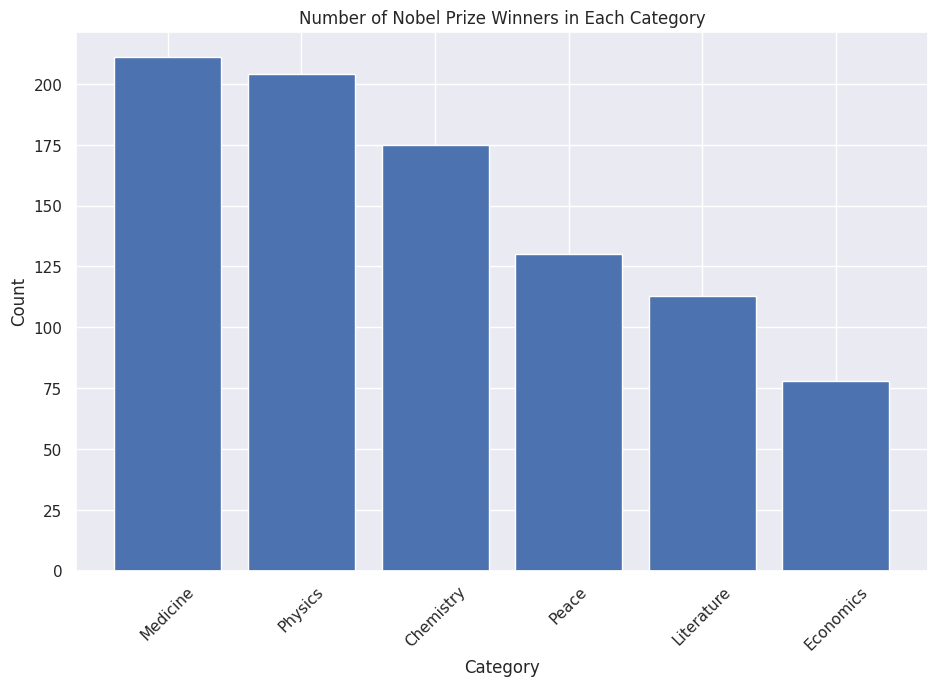

In [17]:
import matplotlib.pyplot as plt

category_counts = nobel['category'].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Nobel Prize Winners in Each Category')
plt.xticks(rotation=45)
plt.show()


In [18]:
import plotly.express as px

fig = px.bar(nobel, x='category', color='category')
fig.show()

## **lineplot**

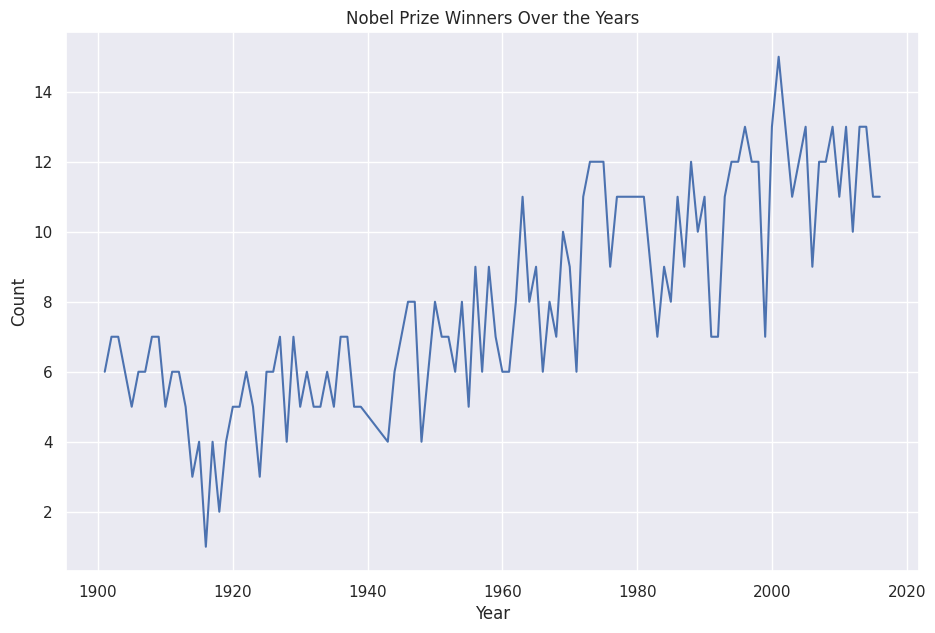

In [19]:
import matplotlib.pyplot as plt

year_counts = nobel['year'].value_counts().sort_index()

plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Nobel Prize Winners Over the Years')
plt.show()


In [20]:
import plotly.express as px

fig = px.line(nobel, x='year', y='laureate_id', color='category')
fig.show()

## **Scatter Plot**

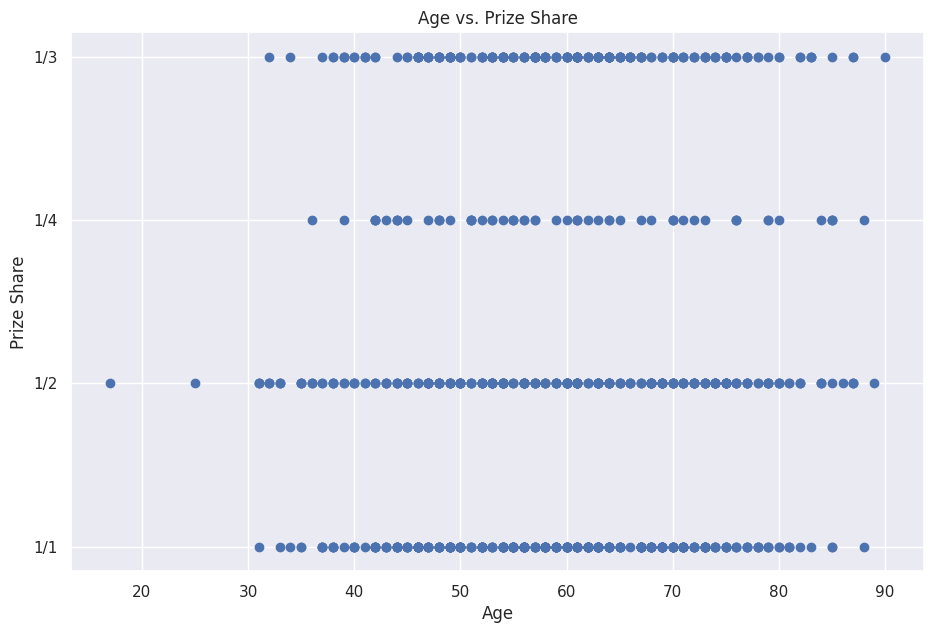

In [21]:
import matplotlib.pyplot as plt

plt.scatter(nobel['age'], nobel['prize_share'])
plt.xlabel('Age')
plt.ylabel('Prize Share')
plt.title('Age vs. Prize Share')
plt.show()

## **Pie Chart**

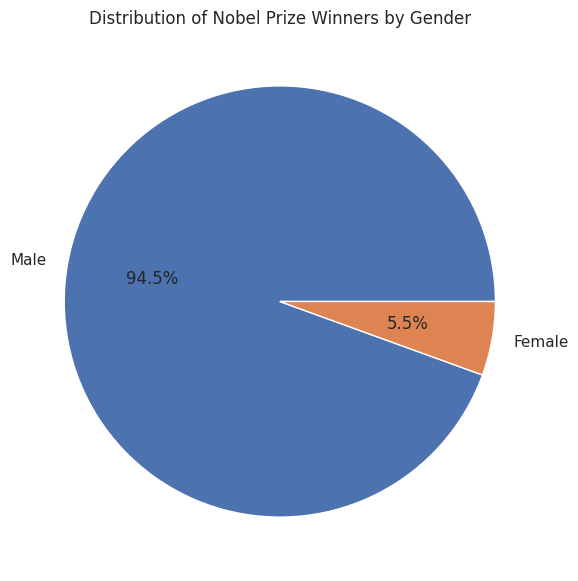

In [22]:
import matplotlib.pyplot as plt

gender_counts = nobel['sex'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Nobel Prize Winners by Gender')
plt.show()

In [23]:
import plotly.express as px

fig = px.pie(nobel, names='sex')
fig.show()

## **Histograms**

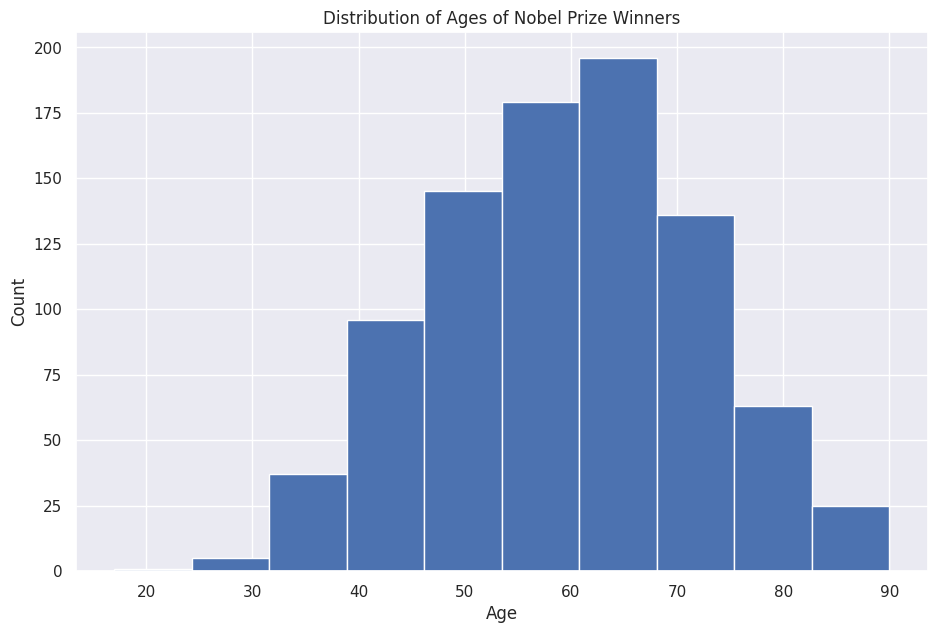

In [24]:
import matplotlib.pyplot as plt

plt.hist(nobel['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages of Nobel Prize Winners')
plt.show()

## **Boxplot**

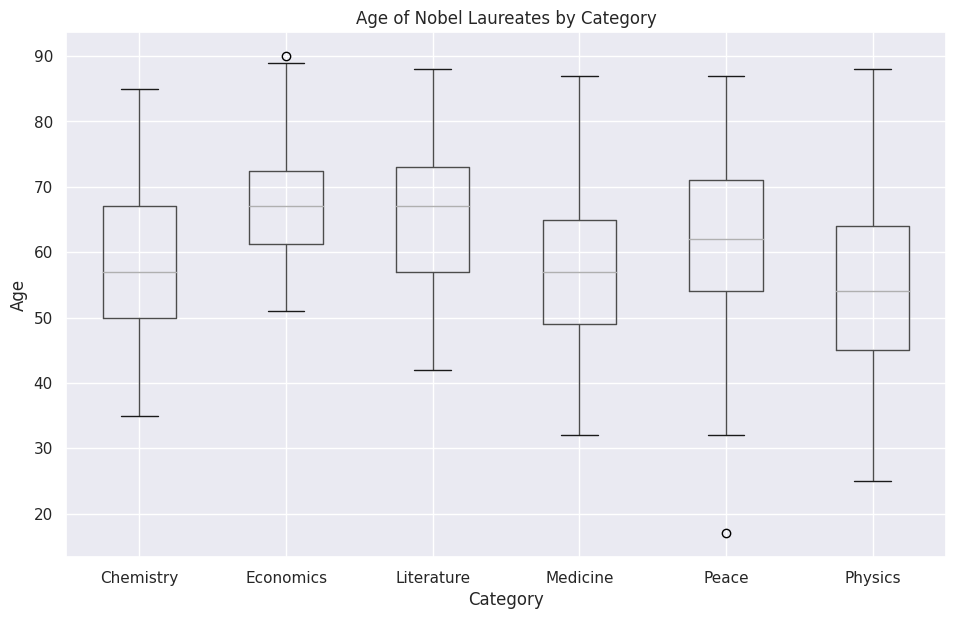

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

nobel['age'] = nobel['year'] - pd.to_datetime(nobel['birth_date']).dt.year

nobel.boxplot(column='age', by='category')
plt.title('Age of Nobel Laureates by Category')
plt.suptitle('')
plt.xlabel('Category')
plt.ylabel('Age')
plt.show()

## **Heatmap**

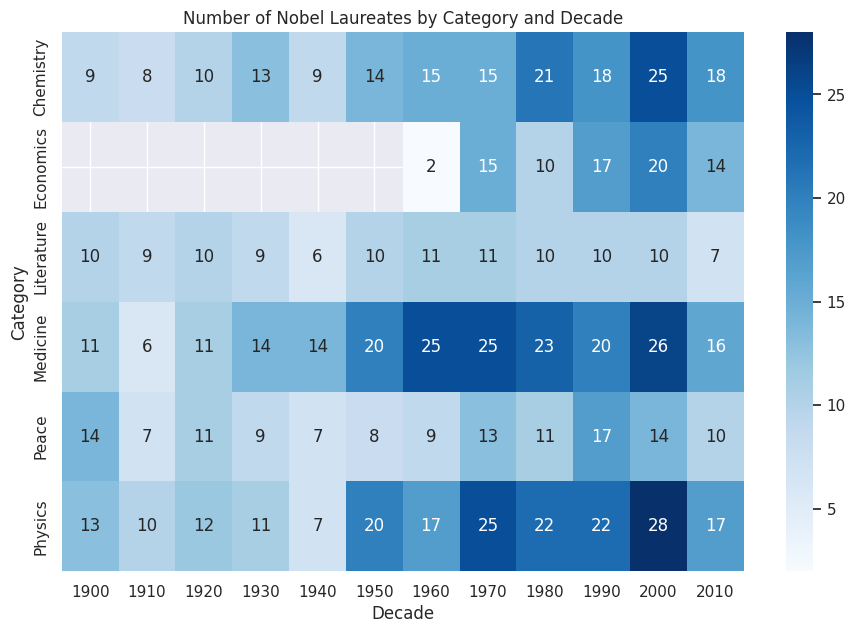

In [26]:
import seaborn as sns
import pandas as pd

nobel['decade'] = (nobel['year'] // 10) * 10

category_decade_counts = nobel.groupby(['category', 'decade'])['prize'].count().reset_index()
category_decade_counts = category_decade_counts.pivot(index='category', columns='decade', values='prize')

sns.heatmap(category_decade_counts, cmap='Blues', annot=True)
plt.title('Number of Nobel Laureates by Category and Decade')
plt.xlabel('Decade')
plt.ylabel('Category')
plt.show()

## **3D Plots**

In [27]:
import plotly.express as px

fig = px.scatter_3d(nobel, x='year', y='age', z='prize_share', opacity=0.7)
fig.update_traces(marker=dict(size=3))
fig.show()

In [28]:
import plotly.express as px

nobel_clean = nobel.dropna(subset=['age'])
fig = px.scatter_3d(nobel_clean, x='year', y='age', z='prize_share', color='category', size='age', opacity=0.7)
fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()

In [29]:
import plotly.express as px

fig = px.scatter_3d(nobel, x='year', y='age', z='category', color='category')
fig.update_layout(title='3D Scatter Plot: Year vs Age vs Category')
fig.show()

#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/